# Michelle pH dependent experiment

Electrode A (old)
1nM total Cu
1e-6 EN


"1nM Cu static.xlsx"

In [1]:
% housekeeping
% clear data and number format
clear; format short e
% turn off warnings
warning off
graphics_toolkit ("notebook"); 
%graphics_toolkit ("plotly"); 
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt(1:n-12);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB']; addpath(JEQUILIBpath);
Cumodelspath=[rootpath,'/Cu_EN']; addpath(Cumodelspath);

In [2]:
% put in constants
%stockCuconc=0.0133; %M
VT=0.05; %total volume
stockCuconc=0.000157366; %M
ENT=1e-6;

In [3]:
% put in data

originalsamplemVnpH=[...
%pH mV
10.180 -126.1
8.074  -48
7.033  -20.9
6.052  -9.5 
1.867  -6.5
];

calibdata=[...
%volCu mV pH
0  -6.5 1.867
0  -6.5 1.867
];


In [4]:
graphics_toolkit("notebook")
% pull out the sample data
pHv=(originalsamplemVnpH(:,1));
mVoriginal=(originalsamplemVnpH(:,2));
mV=calibdata(:,2); 
CuTmeas=1e-9;

%chlorocorrecxtion
%BF1=2.49; BF2=1.14; BF3=0.9; ClT=4.9904e-4; %from Inorg. Chem. 1983. 22. 3323-3326.
%CuTplus=CuTplus./(1+BF1*ClT+BF2*ClT^2+BF3*ClT^3);

moriginalsimple=(59.2/2); 
Eooriginalsimple=mV(1)-moriginalsimple*log10(CuTmeas)
logCuoriginalsimple=(mVoriginal-Eooriginalsimple)/moriginalsimple

Eooriginalsimple = 2.5990e+02


logCuoriginalsimple,1
1,-13.0405
2,-10.402
3,-9.48649
4,-9.10135
5,-9


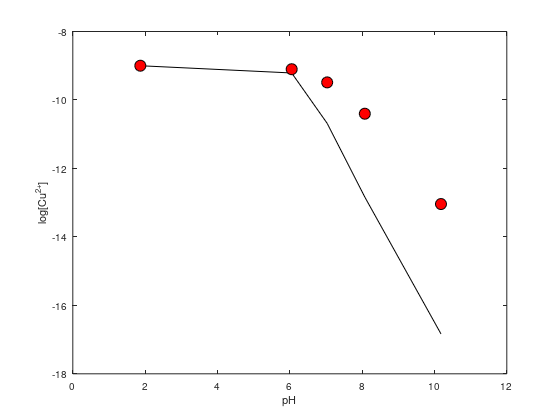

In [5]:
% MODEL FOR COMPARISON
graphics_toolkit("notebook")
%model with just inorganic speciation
%geochemical model
% input the constants and solution chemistry

flag1=2; %flag1 for concentration based search vector (1) or for log based search vector (2).
flag2=1; %flag2 for numerical derivatives (2) or analtyical derivatives (1)
database=[]; 
flag3=0; % flag3 1 for show warnings. 0 no warnings
flag4=0; %if=1 solve tableau one line at a time to get a good initial guess (no solids). really challenging probs only
flag5=0; %if=1 use stored initial guess for including solids

CuT=CuTmeas; inorganicTOTALS=[CuT ENT];
inorganicTOTALS(inorganicTOTALS==0)=1e-16; % get rid of zero values, b/c div by zero error
TOTALS=[inorganicTOTALS]; %TOTALS=inorganicTOTALS;

for i=1:length(pHv);
    pH=pHv(i); pe=20.75-pH; PCO2=10^-3.5;
    [Cuall(i),CuOH,CuOH2s,CuOs,CuCO3s,tenorite,malachite,MASSERR]=CuOHCO2open_EN_allsolids(pH,pe,PCO2,TOTALS',flag1,flag2,flag3,flag4,flag5,database);
end

plot(pHv,log10(Cuall),'k-'); hold on
plot(pHv,logCuoriginalsimple,'ko','markersize',8,'markerfacecolor','r'); 

xlabel('pH'); ylabel('log[Cu^{2+}]')

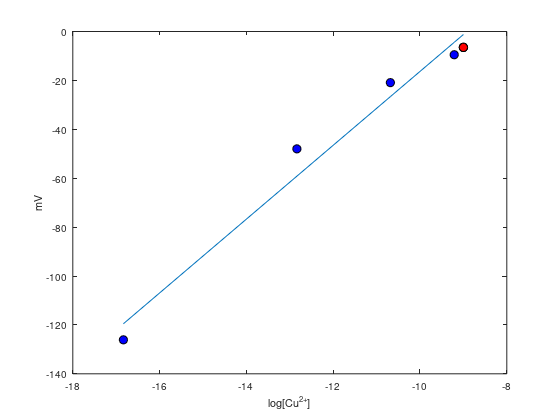

param,1,2
1,15.1009,134.678


In [6]:
% compare mV measured to modeled log Cu

plot(log10(Cuall),mVoriginal,'ko','markerfacecolor','b')
param=polyfit(log10(Cuall),mVoriginal,1)

fit=polyval(param,log10(Cuall));

hold on 

plot(log10(Cuall),fit)

plot([log10(CuTmeas)],mV,'ko','markerfacecolor','r')

xlabel('log[Cu^{2+}]'); ylabel('mV')

In [7]:
log10(Cuall)
logCuoriginalsimple
logCuoriginal

ans,1,2,3,4,5
1,-16.8343,-12.8366,-10.6829,-9.21159,-9


logCuoriginalsimple,1
1,-13.0405
2,-10.402
3,-9.48649
4,-9.10135
5,-9


Execution exception: 'logCuoriginal' undefined near line 1, column 1